<a href="https://colab.research.google.com/github/JDhruvR/ElectronPhotonClassifier/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Clone the repository
!git clone https://github.com/JDhruvR/ElectronPhotonClassifier.git

# Change directory to the cloned repo
%cd ElectronPhotonClassifier

Cloning into 'ElectronPhotonClassifier'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 122 (delta 55), reused 99 (delta 34), pack-reused 0 (from 0)
Receiving objects: 100% (122/122), 149.41 KiB | 659.00 KiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/ElectronPhotonClassifier/ElectronPhotonClassifier


In [10]:
import torch
import torch.optim as optim
import torch.nn as nn

from utils import load_electron_photon_dataset, create_transform, show_image, plot_roc_curve
from models import ResNet15_v1, ResNet15_v2
from train import train, evaluate_model

In [5]:
electron_dataset_path = "/content/drive/MyDrive/cs231n/ElectronPhotonClassifier/data/SingleElectron249k.hdf5"
photon_dataset_path = "/content/drive/MyDrive/cs231n/ElectronPhotonClassifier/data/SinglePhoton249k.hdf5"

In [6]:
train_loader, val_loader, test_loader, transform = load_electron_photon_dataset(
    electron_dataset_path, photon_dataset_path, (0.64, 0.16, 0.20), 512
)

Calculating dataset statistics for normalization...


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  0%|          | 0/4980 [00:00<?, ?it/s]

Dataset statistics - Mean: [0.0012193025322631001, -0.0002637530560605228], Std: [0.023712361231446266, 0.06739004701375961]


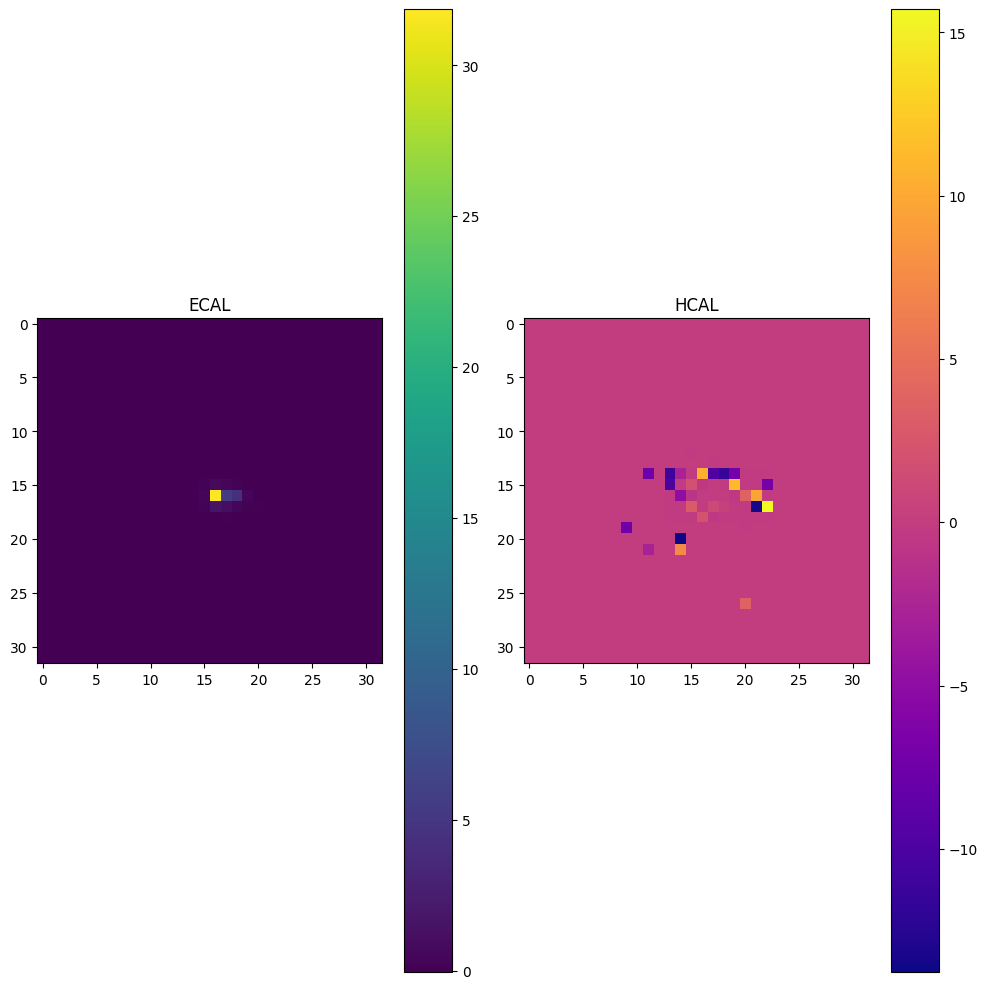

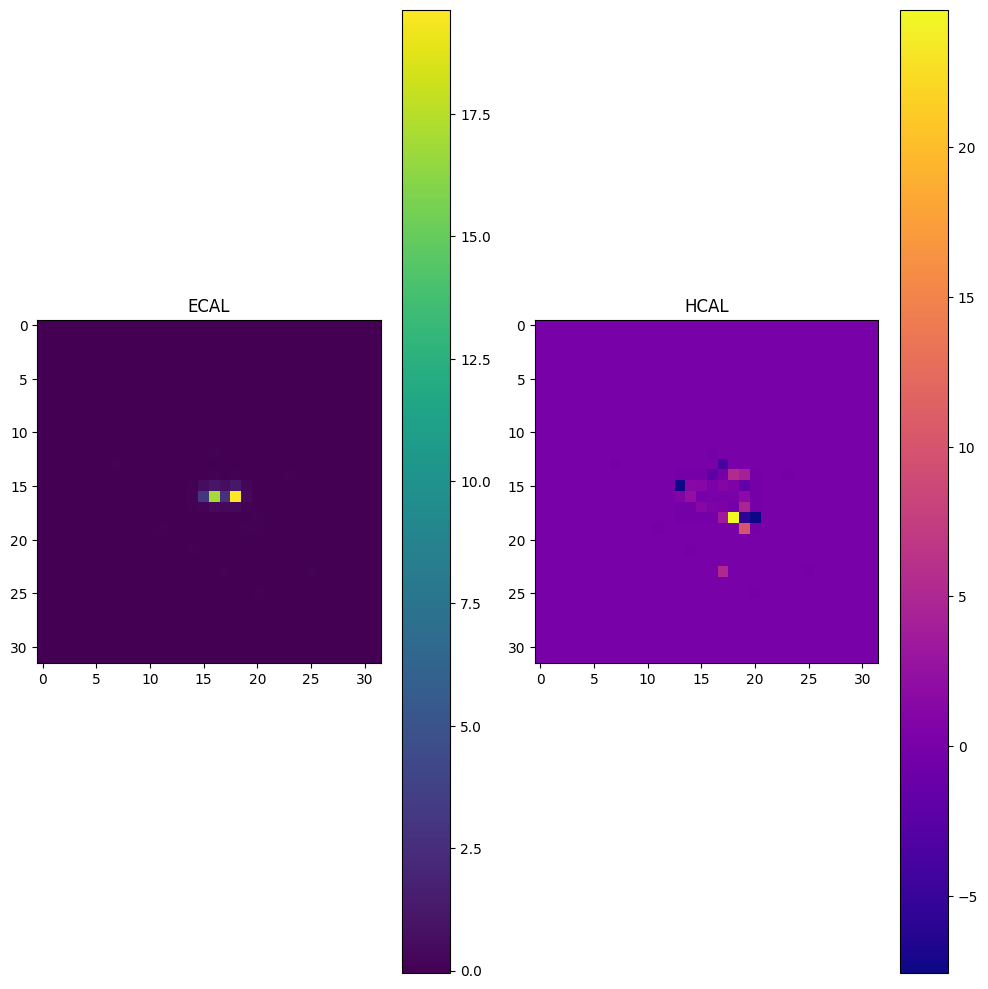

(None, None)

In [7]:
show_image(train_loader.dataset[3][0]), show_image(train_loader.dataset[-3][0])

In [12]:
model = ResNet15_v2()
model.summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]           1,632
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         MaxPool2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 16, 16]           1,056
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 32, 16, 16]           9,248
       BatchNorm2d-9           [-1, 32, 16, 16]              64
             ReLU-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]           2,112
      BatchNorm2d-12           [-1, 64, 16, 16]             128
           Conv2d-13           [-1, 64, 16, 16]           2,112
      BatchNorm2d-14           [-1, 64,

Epoch : 1 / 10: 100%|██████████| 623/623 [01:11<00:00,  8.76it/s]


total_loss: 338.7506086528301, average loss: 0.0011, accuracy: 73.08, for epoch: 1


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.96it/s]


Loss in validation : 0.0010960743529722095, Accuracy : 71.42444779116465


Epoch : 2 / 10: 100%|██████████| 623/623 [01:10<00:00,  8.84it/s]


total_loss: 338.63702315092087, average loss: 0.0011, accuracy: 73.07, for epoch: 2


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.67it/s]


Loss in validation : 0.0010918561602011323, Accuracy : 72.28539156626506


Epoch : 3 / 10: 100%|██████████| 623/623 [01:10<00:00,  8.80it/s]


total_loss: 338.18162551522255, average loss: 0.0011, accuracy: 73.15, for epoch: 3


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.98it/s]


Loss in validation : 0.0010768462670966983, Accuracy : 72.73468875502007


Epoch : 4 / 10: 100%|██████████| 623/623 [01:11<00:00,  8.73it/s]


total_loss: 337.70093861222267, average loss: 0.0011, accuracy: 73.18, for epoch: 4


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.98it/s]


Loss in validation : 0.0011183874448761344, Accuracy : 71.01531124497993


Epoch : 5 / 10: 100%|██████████| 623/623 [01:10<00:00,  8.90it/s]


total_loss: 330.56450667977333, average loss: 0.0010, accuracy: 74.00, for epoch: 5


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.70it/s]


Loss in validation : 0.001052770297974348, Accuracy : 73.51280120481928


Epoch : 6 / 10: 100%|██████████| 623/623 [01:10<00:00,  8.79it/s]


total_loss: 328.84748220443726, average loss: 0.0010, accuracy: 74.21, for epoch: 6


evaluating: 100%|██████████| 156/156 [00:10<00:00, 14.56it/s]


Loss in validation : 0.0010535622714087367, Accuracy : 73.42243975903614


Epoch : 7 / 10: 100%|██████████| 623/623 [01:09<00:00,  8.95it/s]


total_loss: 327.99626380205154, average loss: 0.0010, accuracy: 74.25, for epoch: 7


evaluating: 100%|██████████| 156/156 [00:11<00:00, 14.16it/s]


Loss in validation : 0.0010534967295825481, Accuracy : 73.45005020080322


Epoch : 8 / 10: 100%|██████████| 623/623 [01:09<00:00,  8.99it/s]


total_loss: 327.04406702518463, average loss: 0.0010, accuracy: 74.35, for epoch: 8


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.87it/s]


Loss in validation : 0.0010525024263188243, Accuracy : 73.39482931726907


Epoch : 9 / 10: 100%|██████████| 623/623 [01:09<00:00,  8.90it/s]


total_loss: 326.67006999254227, average loss: 0.0010, accuracy: 74.39, for epoch: 9


evaluating: 100%|██████████| 156/156 [00:10<00:00, 14.95it/s]


Loss in validation : 0.0010533422464504838, Accuracy : 73.40988955823293


Epoch : 10 / 10: 100%|██████████| 623/623 [01:09<00:00,  8.92it/s]


total_loss: 326.1064365506172, average loss: 0.0010, accuracy: 74.46, for epoch: 10


evaluating: 100%|██████████| 156/156 [00:11<00:00, 13.93it/s]


Loss in validation : 0.0010567967547103763, Accuracy : 73.39357429718875


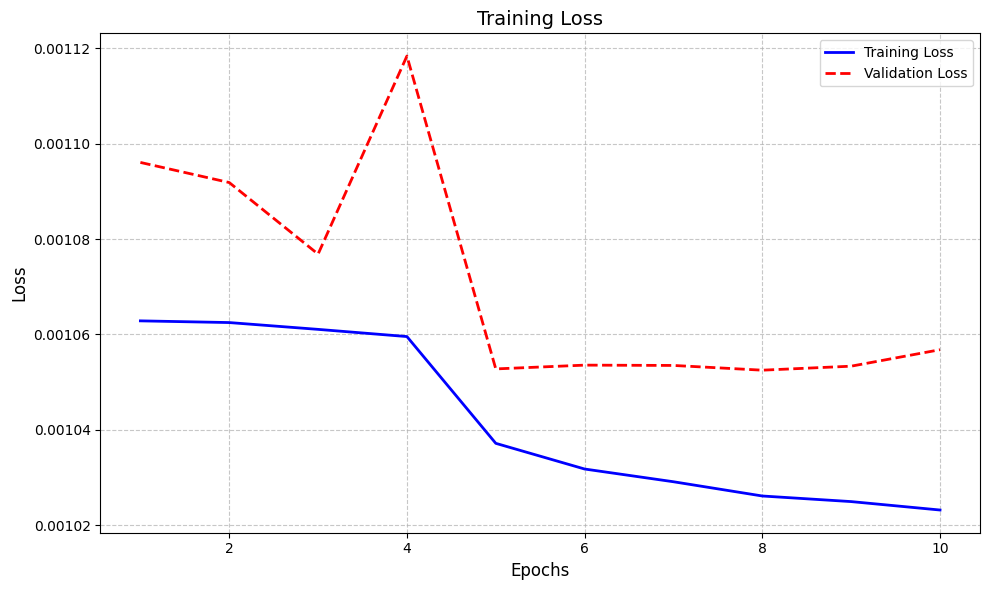

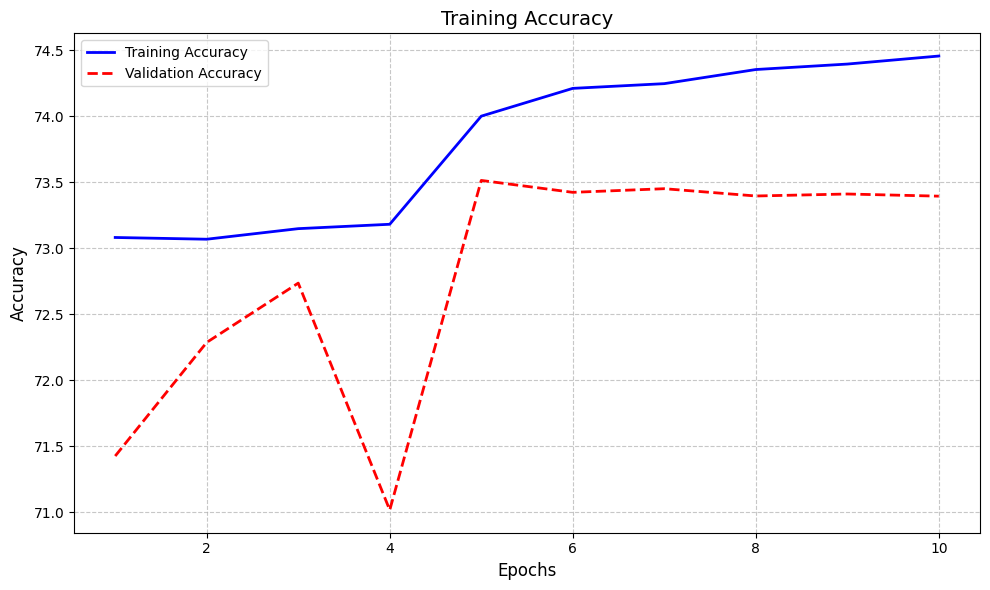

In [16]:
train(
    model=model,
    epochs=30,
    criterion=nn.CrossEntropyLoss(),
    train_loader=train_loader,
    val_loader=val_loader,
    weight_decay=1e-4,
    lr=1e-3,
    device='cuda',
    scheduler_type='plateau'
)

In [17]:
torch.save(model.state_dict(), '/content/drive/MyDrive/cs231n/ElectronPhotonClassifier/models/resnet15_v2.pth')

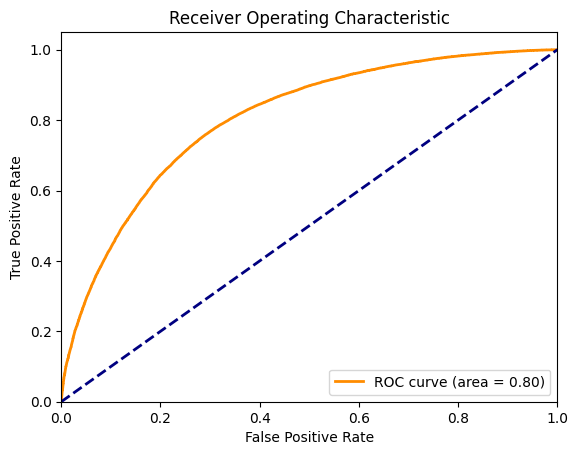

In [18]:
plot_roc_curve(model, val_loader, device='cuda')